# Tourist satisfaction with transport systems to Mount Etna, Sicily. Part 2. Classification.

# This cell will prompt you to connect this notebook with your google account.
from google.colab import drive                                                                        
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Academy/+ Papers/en_proceso/mount_etna/'


In [1]:
base_dir = '/mnt/g/My Drive/Academy/+ Papers/en_proceso/mount_etna/' # To run locally

# 1. Data pre-processing

In [2]:
#!pip install pycaret[full]

## Importing libraries

In [3]:
import pandas as pd
import numpy as np
import imblearn

#ignore log(0) and divide by 0 warning
np.seterr(divide = 'ignore');
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

print('Libraries read!')

Libraries read!


## Reading data

In [4]:
lda_title_data_tuned = pd.read_csv(base_dir + 'data/bus/lda_title_data_tuned.csv')
lda_review_data_tuned = pd.read_csv(base_dir + 'data/bus/lda_review_data_tuned.csv')

# 5. Classification model

### Merging data

In [5]:
lda_title_data_tuned.head(15)

,Title_title,Title_sentiment_rating,Title_Topic_0,Title_Topic_1,Title_Topic_2,Title_Dominant_Topic,Title_Perc_Dominant_Topic
0,must see active volcano least life,0,0.368117,0.583962,0.047921,Topic_1,0.58
1,orgainise easy access,0,0.084181,0.831498,0.084322,Topic_1,0.83
2,cable car,0,0.111264,0.772676,0.116061,Topic_1,0.77
3,NaN,0,0.333333,0.333333,0.333333,Topic_0,0.33
4,earre rule take coat,0,0.387219,0.363460,0.249321,Topic_0,0.39
5,NaN,0,0.333333,0.333333,0.333333,Topic_0,0.33
6,tour cheap good,0,0.085278,0.824599,0.090124,Topic_1,0.82
7,go,0,0.166728,0.649213,0.184059,Topic_1,0.65
8,great gimmick,1,0.112047,0.775869,0.112084,Topic_1,0.78
9,must,0,0.167165,0.666140,0.166696,Topic_1,0.67


In [6]:
lda_review_data_tuned.head(15)

,Review_content,Review_sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Topic_2,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,extraordinary active beautiful landscape ever ...,0,0.009175,0.859691,0.131135,Topic_1,0.86
1,small child august use company sight however g...,0,0.494376,0.497661,0.007963,Topic_1,0.50
2,follow unheard deduction price ast convenient ...,0,0.508946,0.460836,0.030218,Topic_0,0.51
3,stay half hour parking place choose early_morn...,0,0.005486,0.660059,0.334455,Topic_1,0.66
4,beloved chat various thing evening mention ups...,0,0.000953,0.998054,0.000993,Topic_1,1.00
5,start practical information end recommendation...,0,0.103510,0.722649,0.173840,Topic_1,0.72
6,least different company alone end plump cheap ...,0,0.165680,0.596659,0.237662,Topic_1,0.60
7,review site imply ascend complicate reasonably...,0,0.063823,0.831632,0.104545,Topic_1,0.83
8,reviewer offer pay small fortune ride dirty ra...,1,0.447042,0.256468,0.296490,Topic_0,0.45
9,drive station locate halfway plenty parking ma...,0,0.004071,0.186116,0.809813,Topic_2,0.81


In [7]:
data = pd.concat([lda_title_data_tuned.drop(columns=['Title_sentiment_rating'], axis=1), lda_review_data_tuned], axis=1)
data = data.rename(columns={'Review_sentiment_rating': 'sentiment_rating'})
data = data.dropna(subset=['Title_title' ,'Review_content']).reset_index(drop=True)
data.head(15)

,Title_title,Title_Topic_0,Title_Topic_1,Title_Topic_2,Title_Dominant_Topic,Title_Perc_Dominant_Topic,Review_content,sentiment_rating,Review_Topic_0,Review_Topic_1,Review_Topic_2,Review_Dominant_Topic,Review_Perc_Dominant_Topic
0,must see active volcano least life,0.368117,0.583962,0.047921,Topic_1,0.58,extraordinary active beautiful landscape ever ...,0,0.009175,0.859691,0.131135,Topic_1,0.86
1,orgainise easy access,0.084181,0.831498,0.084322,Topic_1,0.83,small child august use company sight however g...,0,0.494376,0.497661,0.007963,Topic_1,0.50
2,cable car,0.111264,0.772676,0.116061,Topic_1,0.77,follow unheard deduction price ast convenient ...,0,0.508946,0.460836,0.030218,Topic_0,0.51
3,earre rule take coat,0.387219,0.363460,0.249321,Topic_0,0.39,beloved chat various thing evening mention ups...,0,0.000953,0.998054,0.000993,Topic_1,1.00
4,tour cheap good,0.085278,0.824599,0.090124,Topic_1,0.82,least different company alone end plump cheap ...,0,0.165680,0.596659,0.237662,Topic_1,0.60
5,go,0.166728,0.649213,0.184059,Topic_1,0.65,review site imply ascend complicate reasonably...,0,0.063823,0.831632,0.104545,Topic_1,0.83
6,great gimmick,0.112047,0.775869,0.112084,Topic_1,0.78,reviewer offer pay small fortune ride dirty ra...,1,0.447042,0.256468,0.296490,Topic_0,0.45
7,must,0.167165,0.666140,0.166696,Topic_1,0.67,drive station locate halfway plenty parking ma...,0,0.004071,0.186116,0.809813,Topic_2,0.81
8,fun expect easy enough public transport,0.048035,0.773577,0.178387,Topic_1,0.77,arrive use visit crateri silvestri eruption si...,0,0.003093,0.310276,0.686631,Topic_2,0.69
9,top crater etna,0.083603,0.086593,0.829804,Topic_2,0.83,climb amazing confusing begining find perfect ...,0,0.005512,0.969706,0.024782,Topic_1,0.97


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Title_title                 788 non-null    object 
 1   Title_Topic_0               788 non-null    float64
 2   Title_Topic_1               788 non-null    float64
 3   Title_Topic_2               788 non-null    float64
 4   Title_Dominant_Topic        788 non-null    object 
 5   Title_Perc_Dominant_Topic   788 non-null    float64
 6   Review_content              788 non-null    object 
 7   sentiment_rating            788 non-null    int64  
 8   Review_Topic_0              788 non-null    float64
 9   Review_Topic_1              788 non-null    float64
 10  Review_Topic_2              788 non-null    float64
 11  Review_Dominant_Topic       788 non-null    object 
 12  Review_Perc_Dominant_Topic  788 non-null    float64
dtypes: float64(8), int64(1), object(4)


In [9]:
from pycaret.classification import *

without_pca = setup(data = data, 
            target = 'sentiment_rating',
            session_id = 42,
            normalize = True,
            #normalize_method = 'minmax',
            transformation = True,
            #pca = True,
            ignore_features=['Title_title', 'Review_content', 'Title_Dominant_Topic', 'Title_Perc_Dominant_Topic', 
                             'Review_Dominant_Topic', 'Review_Perc_Dominant_Topic'],
            use_gpu = True,
            fix_imbalance=True,
            fix_imbalance_method=imblearn.over_sampling.SVMSMOTE(),
            data_split_stratify = True,
            fold_strategy = 'stratifiedkfold',
            silent = True,
            log_experiment = True,
            experiment_name = 'No pca, oversampling with SVMSMOTE'
           )

,Description,Value
0,session_id,42
1,Target,sentiment_rating
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(788, 13)"
5,Missing Values,0
6,Numeric Features,6
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


eda(display_format = 'bokeh')

In [10]:
best_models = compare_models(turbo=False, exclude=['gpc', 'mlp', 'svm', 'ridge'], sort='recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7785,0.6391,0.3905,0.2514,0.2849,0.1704,0.1848,0.4260
qda,Quadratic Discriminant Analysis,0.7695,0.6724,0.3476,0.1866,0.2343,0.1154,0.1281,0.0490
rbfsvm,SVM - Radial Kernel,0.7568,0.6862,0.3452,0.2035,0.2377,0.1148,0.1275,0.0890
nb,Naive Bayes,0.6951,0.5681,0.3262,0.1375,0.1896,0.0435,0.0493,0.0350
lda,Linear Discriminant Analysis,0.7840,0.6519,0.3119,0.1996,0.2335,0.1193,0.1275,0.0400
lr,Logistic Regression,0.7876,0.6473,0.2952,0.1982,0.2291,0.1155,0.1215,0.0420
ada,Ada Boost Classifier,0.7876,0.6509,0.2952,0.2027,0.2365,0.1212,0.1248,0.2700
gbc,Gradient Boosting Classifier,0.8456,0.6984,0.2548,0.2661,0.2551,0.1747,0.1750,0.2850
dt,Decision Tree Classifier,0.7931,0.5471,0.2310,0.1722,0.1879,0.0778,0.0817,0.0380
et,Extra Trees Classifier,0.8384,0.6205,0.2119,0.2953,0.2177,0.1342,0.1481,0.8300


!mlflow ui

## SVM - Radial Kernel

In [11]:
# Best ML analysis
rbfsvm = create_model(estimator = 'rbfsvm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7857,0.7901,0.2857,0.2222,0.2500,0.1273,0.1286
1,0.6545,0.6088,0.6667,0.1905,0.2963,0.1525,0.2052
2,0.8000,0.7823,0.3333,0.2222,0.2667,0.1562,0.1605
3,0.7273,0.6803,0.5000,0.2000,0.2857,0.1538,0.1786
4,0.8364,0.6531,0.1667,0.2000,0.1818,0.0917,0.0922
5,0.6909,0.5850,0.3333,0.1333,0.1905,0.0410,0.0476
6,0.6727,0.5646,0.0000,0.0000,0.0000,-0.1702,-0.1849
7,0.8909,0.7925,0.3333,0.5000,0.4000,0.3426,0.3512
8,0.7455,0.6531,0.1667,0.1000,0.1250,-0.0132,-0.0137
9,0.7636,0.7517,0.6667,0.2667,0.3810,0.2667,0.3095


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


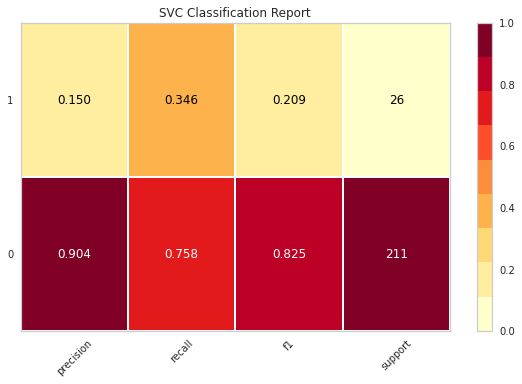

In [12]:
# Plotting the classification report
plot_model(estimator = rbfsvm, plot = 'class_report')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


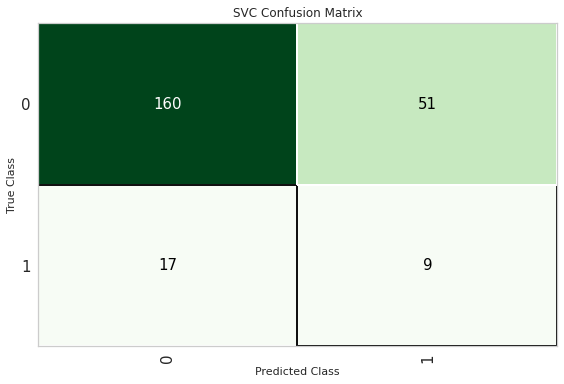

In [13]:
# Plotting the confusion matrix
plot_model(estimator = rbfsvm, plot = 'confusion_matrix')

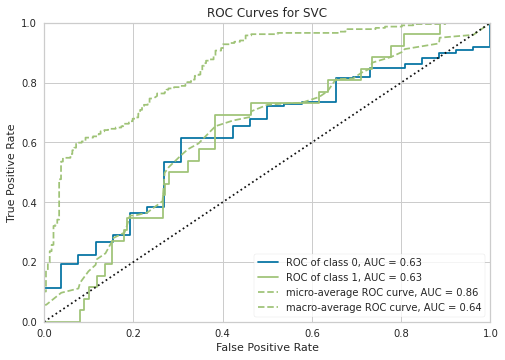

In [14]:
# Plotting the AUC
plot_model(estimator = rbfsvm, plot = 'auc')

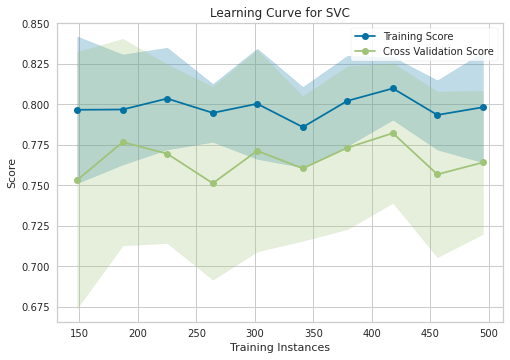

In [15]:
# Plotting the learning curve
plot_model(estimator = rbfsvm, plot = 'learning' )

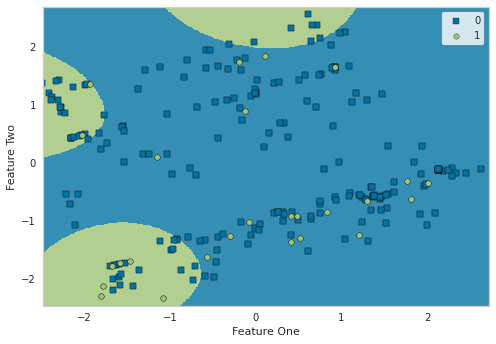

In [16]:
plot_model(estimator = rbfsvm, plot='boundary')

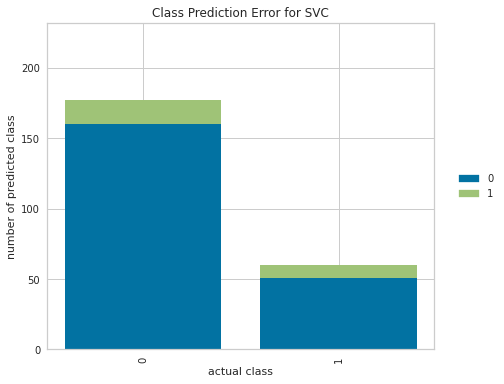

In [17]:
plot_model(estimator = rbfsvm, plot = 'error')

In [18]:
evaluate_model(estimator = rbfsvm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: rbfsvm

In [19]:
# tune hyperparameters to optimize AUC
tuned_rbfsvm = tune_model(rbfsvm, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7500,0.8047,0.5714,0.2667,0.3636,0.2329,0.2591
1,0.6364,0.5952,0.6667,0.1818,0.2857,0.1379,0.1905
2,0.8000,0.6837,0.3333,0.2222,0.2667,0.1562,0.1605
3,0.7636,0.7075,0.6667,0.2667,0.3810,0.2667,0.3095
4,0.8364,0.6905,0.5000,0.3333,0.4000,0.3096,0.3182
5,0.6000,0.6395,0.6667,0.1667,0.2667,0.1116,0.1625
6,0.6182,0.6361,0.3333,0.1053,0.1600,-0.0070,-0.0089
7,0.7818,0.8571,0.8333,0.3125,0.4545,0.3517,0.4179
8,0.7636,0.6803,0.6667,0.2667,0.3810,0.2667,0.3095
9,0.7273,0.7347,0.6667,0.2353,0.3478,0.2224,0.2708


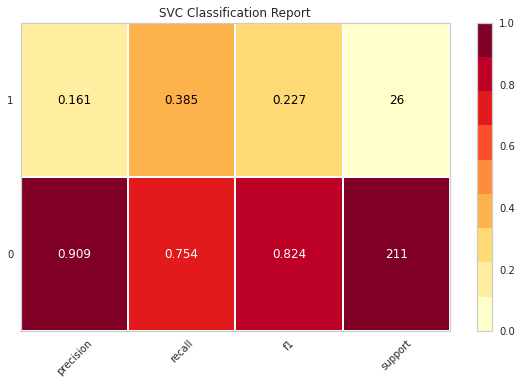

In [20]:
# Plotting the classification report
plot_model(estimator = tuned_rbfsvm, plot = 'class_report')

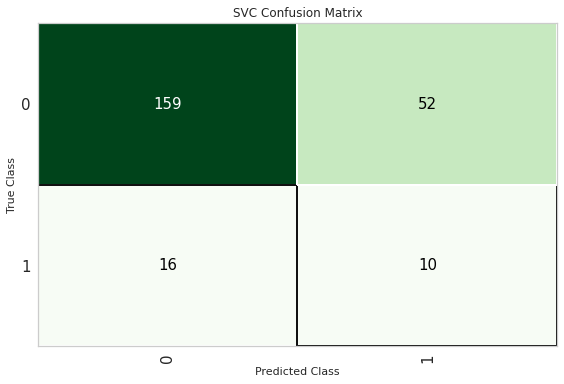

In [21]:
# Plotting the confusion matrix
plot_model(estimator = tuned_rbfsvm, plot = 'confusion_matrix')

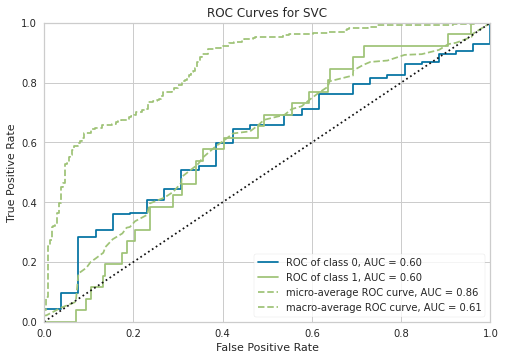

In [22]:
# Plotting the AUC
plot_model(estimator = tuned_rbfsvm, plot = 'auc')

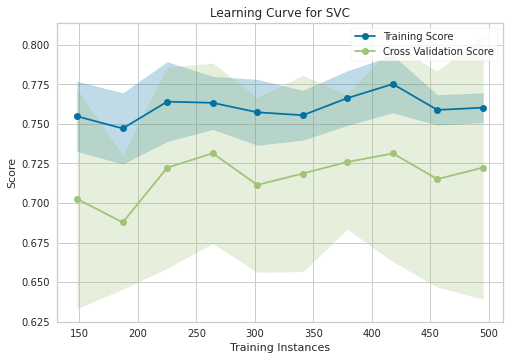

In [23]:
# Plotting the learning curve
plot_model(estimator = tuned_rbfsvm, plot = 'learning' )

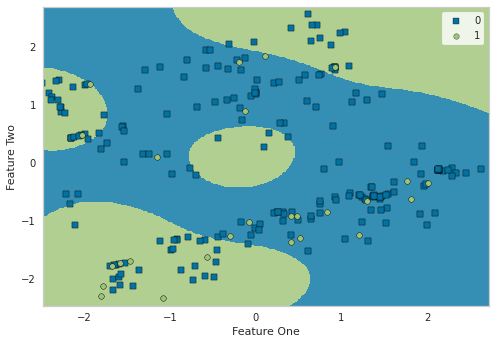

In [24]:
plot_model(estimator = tuned_rbfsvm, plot='boundary')

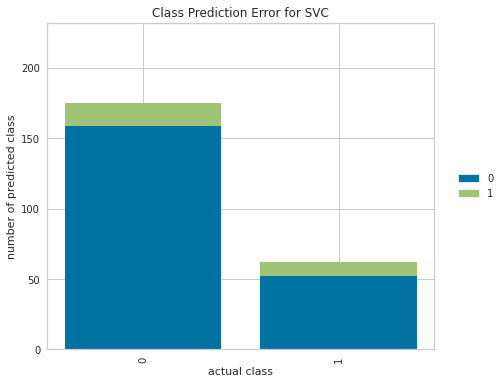

In [25]:
plot_model(estimator = tuned_rbfsvm, plot = 'error')

In [26]:
evaluate_model(estimator = tuned_rbfsvm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## K Neighbors Classifier - KNN

In [27]:
# Best ML analysis
knn = create_model(estimator = 'knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8214,0.7770,0.5714,0.3636,0.4444,0.3443,0.3568
1,0.6727,0.6514,0.5000,0.1667,0.2500,0.1033,0.1288
2,0.7818,0.4133,0.1667,0.1250,0.1429,0.0208,0.0211
3,0.8182,0.6633,0.5000,0.3000,0.3750,0.2763,0.2887
4,0.7818,0.5527,0.1667,0.1250,0.1429,0.0208,0.0211
5,0.7455,0.6735,0.5000,0.2143,0.3000,0.1738,0.1972
6,0.7273,0.4796,0.1667,0.0909,0.1176,-0.0274,-0.0292
7,0.9091,0.8214,0.3333,0.6667,0.4444,0.4009,0.4296
8,0.8000,0.7041,0.6667,0.3077,0.4211,0.3195,0.3544
9,0.7273,0.6548,0.3333,0.1538,0.2105,0.0720,0.0799


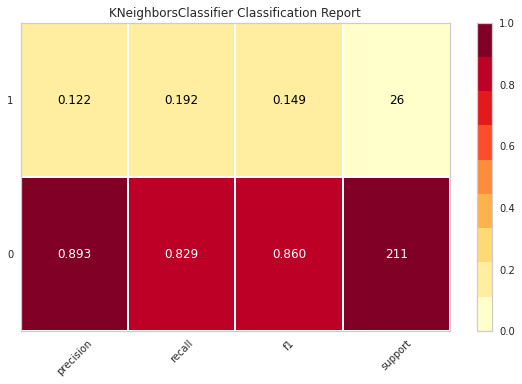

In [28]:
# Plotting the classification report
plot_model(estimator = knn, plot = 'class_report')

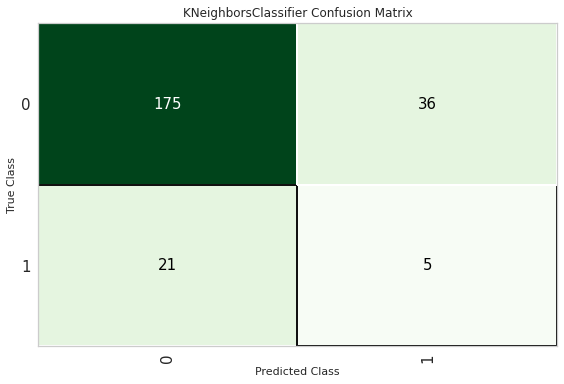

In [29]:
# Plotting the confusion matrix
plot_model(estimator = knn, plot = 'confusion_matrix')

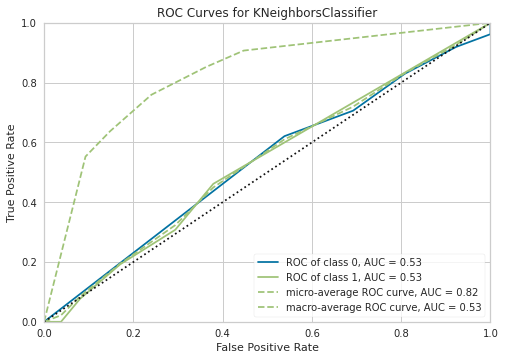

In [30]:
# Plotting the AUC
plot_model(estimator = knn, plot = 'auc')

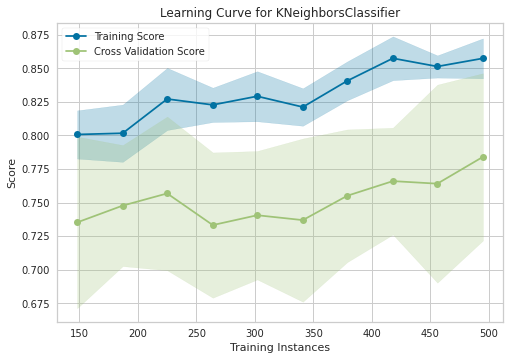

In [31]:
# Plotting the learning curve
plot_model(estimator = knn, plot = 'learning' )

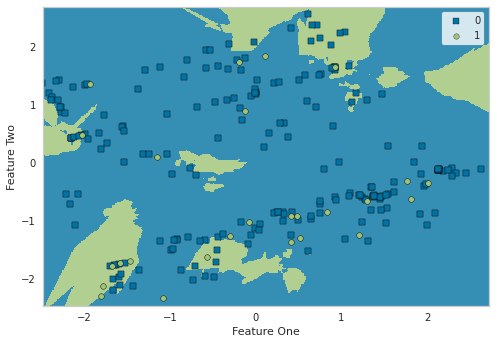

In [32]:
plot_model(estimator = knn, plot='boundary')

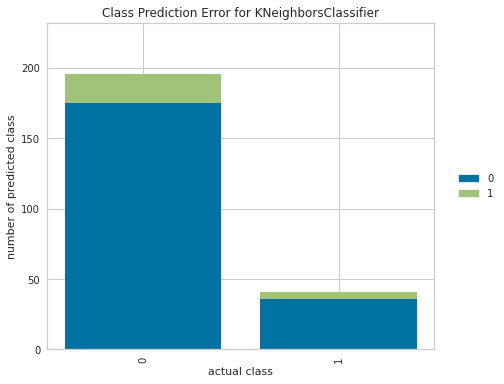

In [33]:
plot_model(estimator = knn, plot = 'error')

In [34]:
evaluate_model(estimator = knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: knn

In [35]:
# tune hyperparameters to optimize AUC
tuned_knn = tune_model(knn, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7679,0.7478,0.2857,0.2000,0.2353,0.1034,0.1057
1,0.6364,0.5884,0.6667,0.1818,0.2857,0.1379,0.1905
2,0.8000,0.8010,0.5000,0.2727,0.3529,0.2466,0.2624
3,0.6909,0.6701,0.5000,0.1765,0.2609,0.1188,0.1446
4,0.7455,0.6718,0.5000,0.2143,0.3000,0.1738,0.1972
5,0.5818,0.5663,0.5000,0.1304,0.2069,0.0409,0.0580
6,0.6545,0.4881,0.1667,0.0667,0.0952,-0.0718,-0.0833
7,0.8727,0.7874,0.6667,0.4444,0.5333,0.4630,0.4758
8,0.7636,0.5901,0.6667,0.2667,0.3810,0.2667,0.3095
9,0.7091,0.7449,0.6667,0.2222,0.3333,0.2029,0.2531


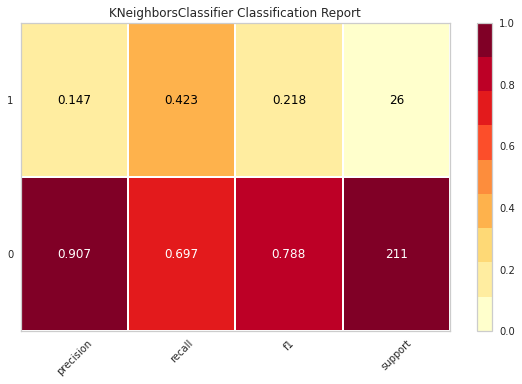

In [36]:
# Plotting the classification report
plot_model(estimator = tuned_knn, plot = 'class_report')

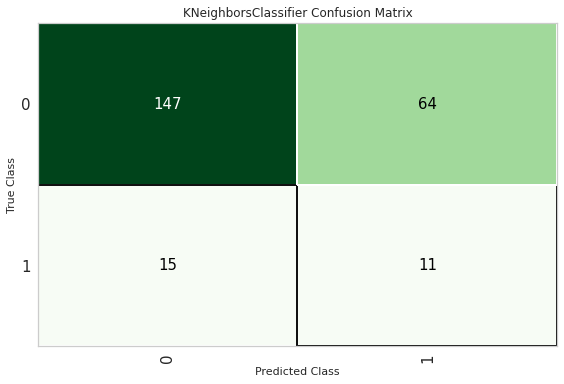

In [37]:
# Plotting the confusion matrix
plot_model(estimator = tuned_knn, plot = 'confusion_matrix')

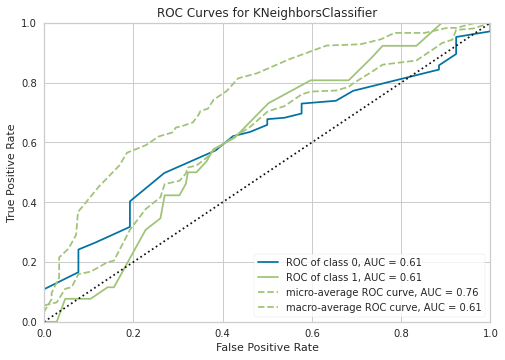

In [38]:
# Plotting the AUC
plot_model(estimator = tuned_knn, plot = 'auc')

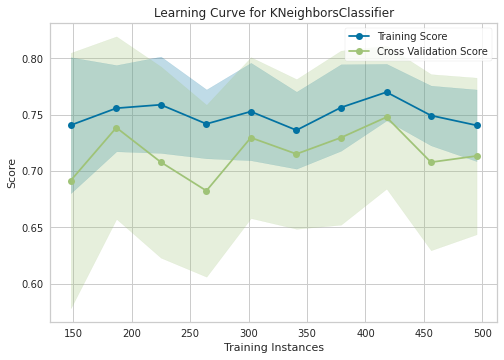

In [39]:
# Plotting the learning curve
plot_model(estimator = tuned_knn, plot = 'learning' )

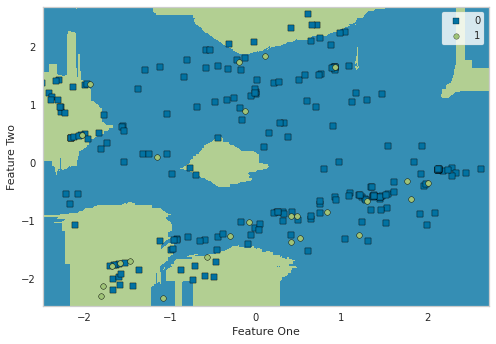

In [40]:
plot_model(estimator = tuned_knn, plot='boundary')

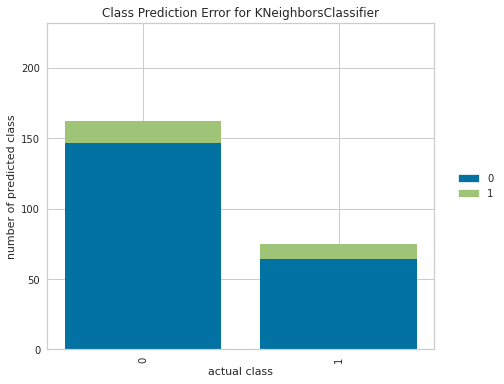

In [41]:
plot_model(estimator = tuned_knn, plot = 'error')

In [42]:
evaluate_model(estimator = tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Naive Bayes

In [43]:
# Best ML analysis
nb = create_model(estimator = 'nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6786,0.6676,0.4286,0.1765,0.2500,0.0886,0.1028
1,0.6545,0.5918,0.3333,0.1176,0.1739,0.0151,0.0184
2,0.7818,0.7619,0.3333,0.2000,0.2500,0.1316,0.1375
3,0.6000,0.5238,0.3333,0.1000,0.1538,-0.0168,-0.0220
4,0.7636,0.5986,0.3333,0.1818,0.2353,0.1096,0.1166
5,0.6545,0.4320,0.1667,0.0667,0.0952,-0.0718,-0.0833
6,0.7636,0.5340,0.0000,0.0000,0.0000,-0.1331,-0.1336
7,0.8182,0.5680,0.5000,0.3000,0.3750,0.2763,0.2887
8,0.6182,0.4150,0.1667,0.0588,0.0870,-0.0886,-0.1078
9,0.6182,0.5884,0.6667,0.1739,0.2759,0.1243,0.1763


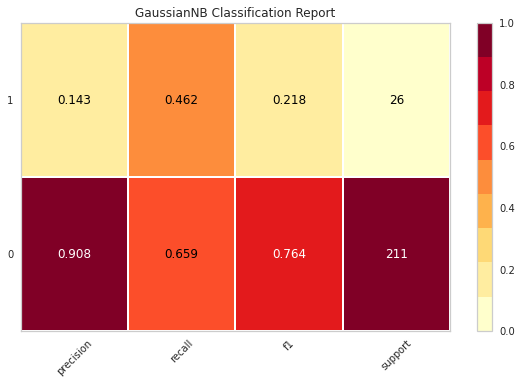

In [44]:
# Plotting the classification report
plot_model(estimator = nb, plot = 'class_report')

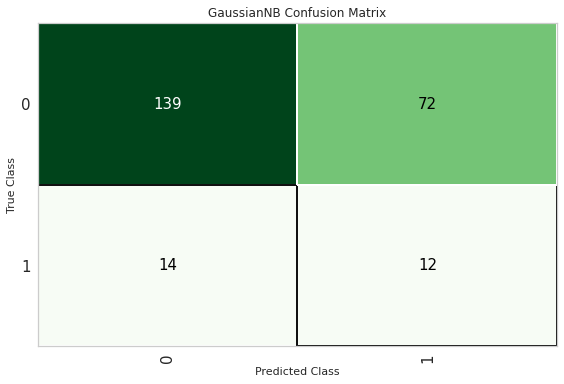

In [45]:
# Plotting the confusion matrix
plot_model(estimator = nb, plot = 'confusion_matrix')

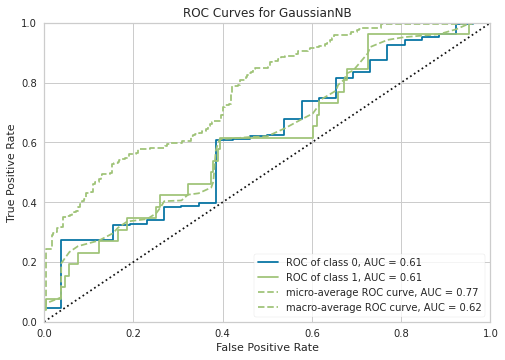

In [46]:
# Plotting the AUC
plot_model(estimator = nb, plot = 'auc')

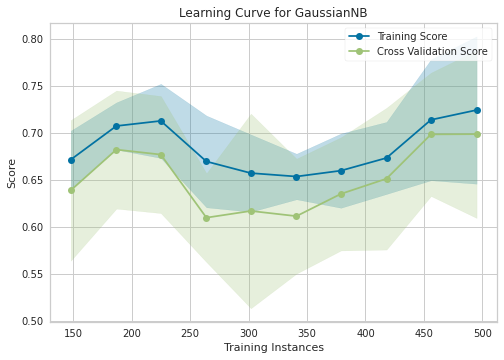

In [47]:
# Plotting the learning curve
plot_model(estimator = nb, plot = 'learning' )

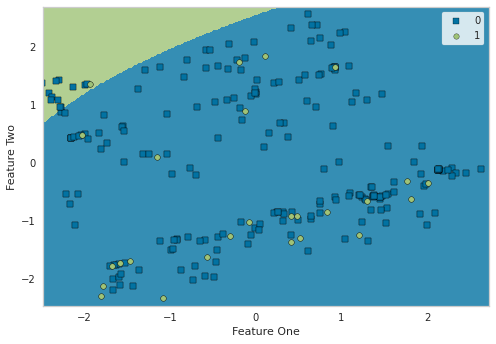

In [48]:
plot_model(estimator = nb, plot='boundary')

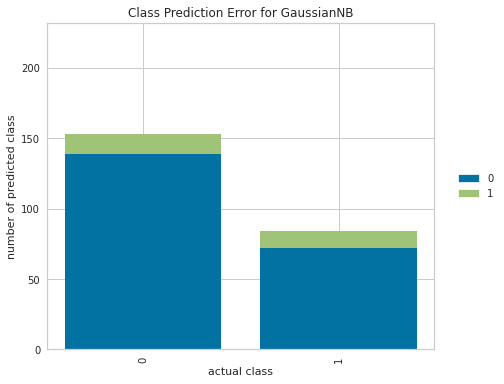

In [49]:
plot_model(estimator = nb, plot = 'error')

In [50]:
evaluate_model(estimator = nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: nb

In [51]:
# tune hyperparameters to optimize AUC
tuned_nb = tune_model(nb, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6786,0.6676,0.4286,0.1765,0.2500,0.0886,0.1028
1,0.6545,0.5952,0.3333,0.1176,0.1739,0.0151,0.0184
2,0.7818,0.7619,0.3333,0.2000,0.2500,0.1316,0.1375
3,0.6000,0.5238,0.3333,0.1000,0.1538,-0.0168,-0.0220
4,0.7636,0.5986,0.3333,0.1818,0.2353,0.1096,0.1166
5,0.6545,0.4320,0.1667,0.0667,0.0952,-0.0718,-0.0833
6,0.7818,0.5340,0.0000,0.0000,0.0000,-0.1224,-0.1224
7,0.8182,0.5680,0.5000,0.3000,0.3750,0.2763,0.2887
8,0.6182,0.4150,0.1667,0.0588,0.0870,-0.0886,-0.1078
9,0.6182,0.5884,0.6667,0.1739,0.2759,0.1243,0.1763


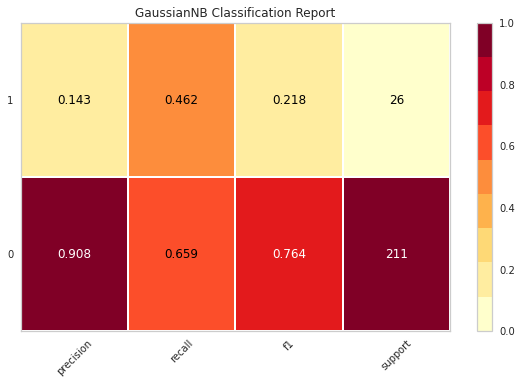

In [52]:
# Plotting the classification report
plot_model(estimator = tuned_nb, plot = 'class_report')

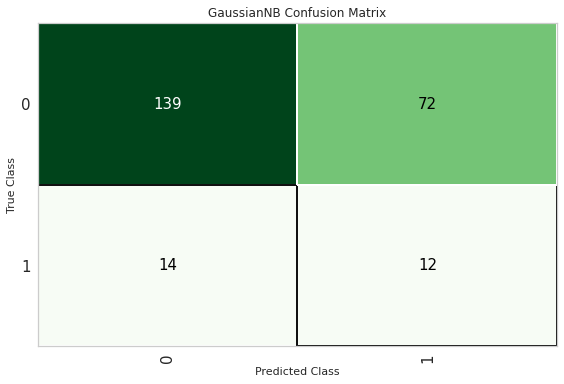

In [53]:
# Plotting the confusion matrix
plot_model(estimator = tuned_nb, plot = 'confusion_matrix')

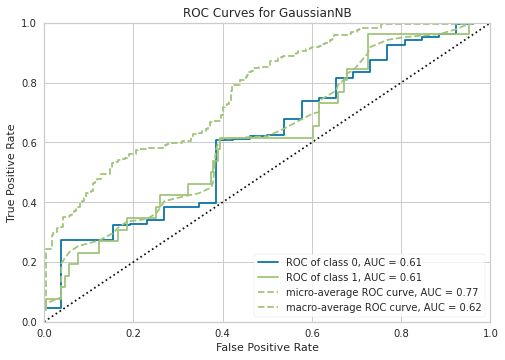

In [54]:
# Plotting the AUC
plot_model(estimator = tuned_nb, plot = 'auc')

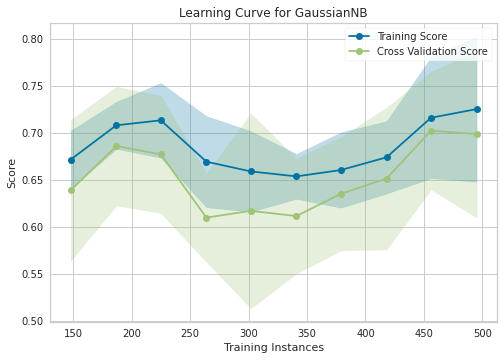

In [55]:
# Plotting the learning curve
plot_model(estimator = tuned_nb, plot = 'learning' )

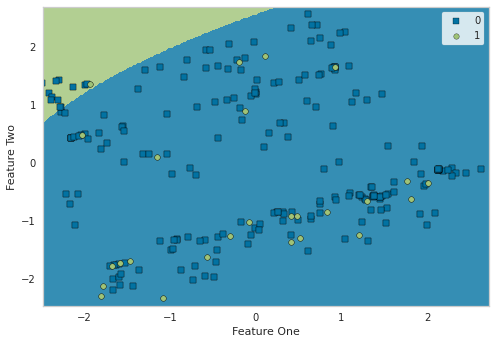

In [56]:
plot_model(estimator = tuned_nb, plot='boundary')

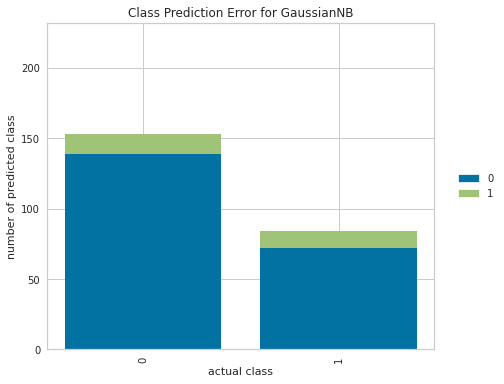

In [57]:
plot_model(estimator = tuned_nb, plot = 'error')

In [58]:
evaluate_model(estimator = tuned_nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Gradient Boosting Classifier

In [59]:
# Best ML analysis
gbc = create_model(estimator = 'gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9286,0.8178,0.7143,0.7143,0.7143,0.6735,0.6735
1,0.7636,0.6190,0.1667,0.1111,0.1333,0.0028,0.0029
2,0.8364,0.7177,0.1667,0.2000,0.1818,0.0917,0.0922
3,0.8364,0.6667,0.3333,0.2857,0.3077,0.2155,0.2164
4,0.8909,0.7075,0.3333,0.5000,0.4000,0.3426,0.3512
5,0.7818,0.6633,0.3333,0.2000,0.2500,0.1316,0.1375
6,0.8182,0.6735,0.0000,0.0000,0.0000,-0.0956,-0.0980
7,0.8727,0.6361,0.0000,0.0000,0.0000,-0.0322,-0.0476
8,0.8727,0.8027,0.3333,0.4000,0.3636,0.2936,0.2951
9,0.8545,0.6803,0.1667,0.2500,0.2000,0.1235,0.1266


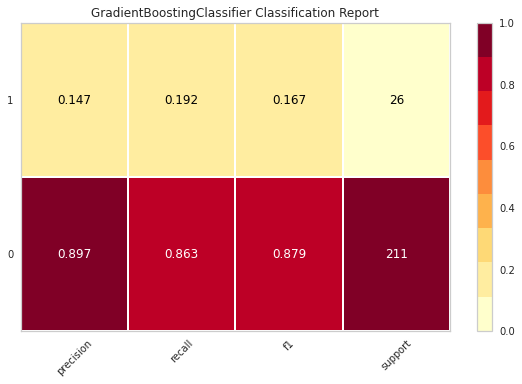

In [60]:
# Plotting the classification report
plot_model(estimator = gbc, plot = 'class_report')

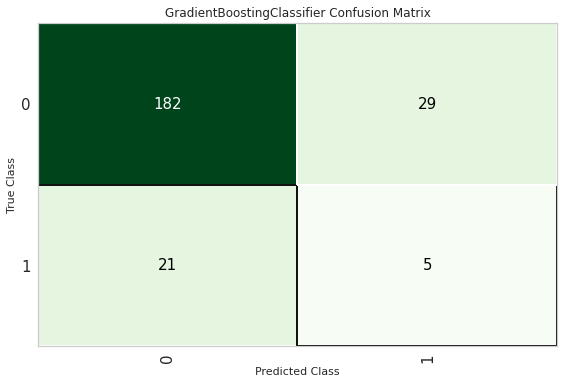

In [61]:
# Plotting the confusion matrix
plot_model(estimator = gbc, plot = 'confusion_matrix')

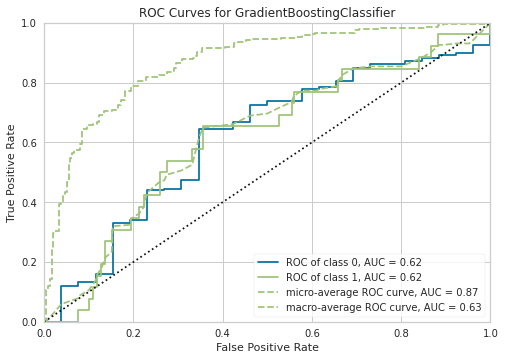

In [62]:
# Plotting the AUC
plot_model(estimator = gbc, plot = 'auc')

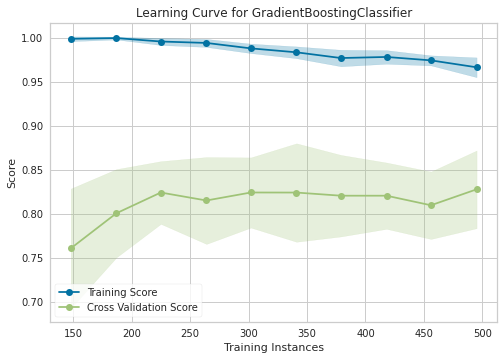

In [63]:
# Plotting the learning curve
plot_model(estimator = gbc, plot = 'learning' )

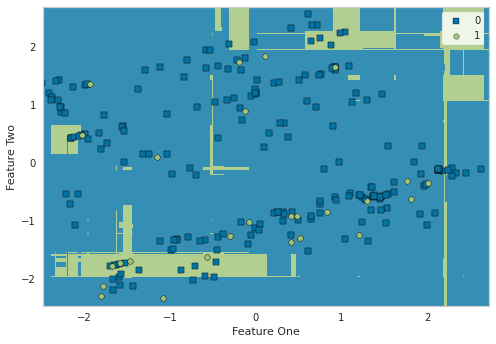

In [64]:
plot_model(estimator = gbc, plot='boundary')

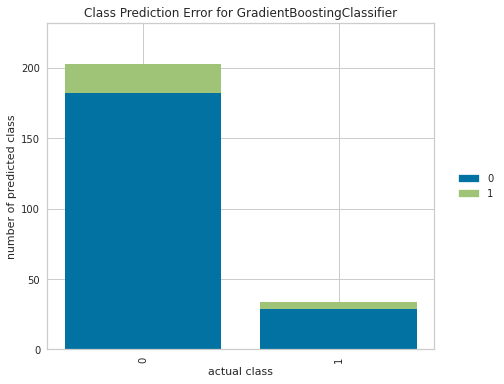

In [65]:
plot_model(estimator = gbc, plot = 'error')

In [66]:
evaluate_model(estimator = gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Tuned model: gbc

In [67]:
# tune hyperparameters to optimize AUC
tuned_gbc = tune_model(gbc, optimize = 'recall', n_iter=80)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7321,0.4796,0.1429,0.1000,0.1176,-0.0345,-0.0352
1,0.3091,0.3929,0.5000,0.0789,0.1364,-0.0642,-0.1446
2,0.6182,0.5612,0.5000,0.1429,0.2222,0.0633,0.0851
3,0.6727,0.3776,0.0000,0.0000,0.0000,-0.1702,-0.1849
4,0.8727,0.6361,0.3333,0.4000,0.3636,0.2936,0.2951
5,0.5273,0.3690,0.1667,0.0455,0.0714,-0.1207,-0.1667
6,0.5818,0.4728,0.3333,0.0952,0.1481,-0.0260,-0.0349
7,0.3818,0.5068,0.6667,0.1111,0.1905,0.0043,0.0089
8,0.7273,0.6820,0.5000,0.2000,0.2857,0.1538,0.1786
9,0.5273,0.2959,0.0000,0.0000,0.0000,-0.2017,-0.2645


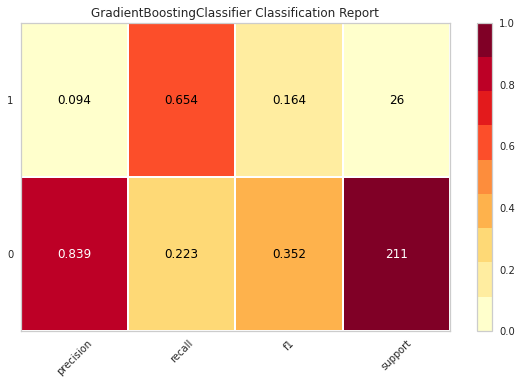

In [68]:
# Plotting the classification report
plot_model(estimator = tuned_gbc, plot = 'class_report')

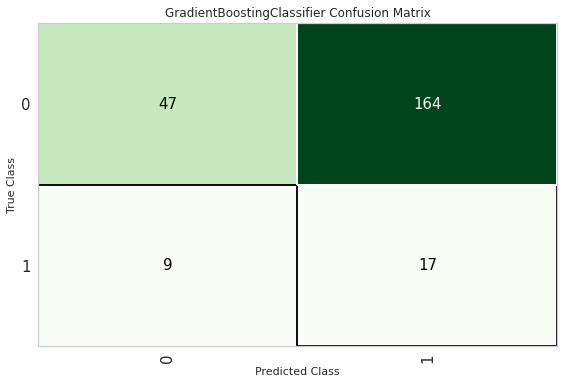

In [69]:
# Plotting the confusion matrix
plot_model(estimator = tuned_gbc, plot = 'confusion_matrix')

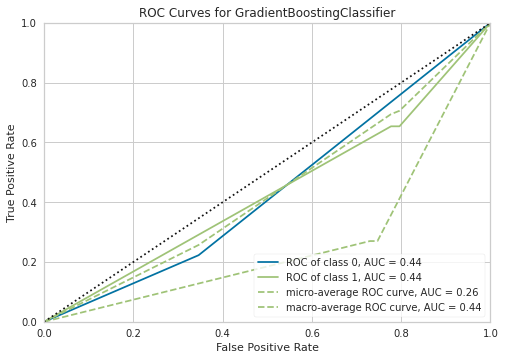

In [70]:
# Plotting the AUC
plot_model(estimator = tuned_gbc, plot = 'auc')

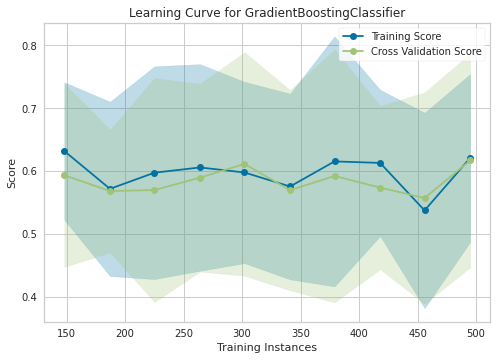

In [71]:
# Plotting the learning curve
plot_model(estimator = tuned_gbc, plot = 'learning' )

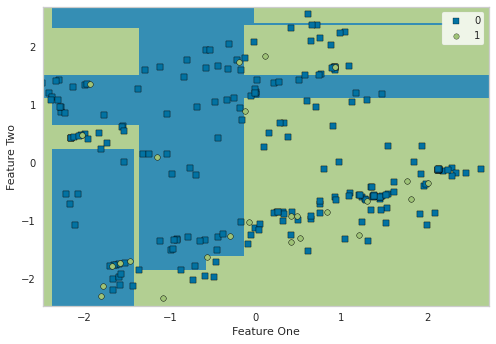

In [72]:
plot_model(estimator = tuned_gbc, plot='boundary')

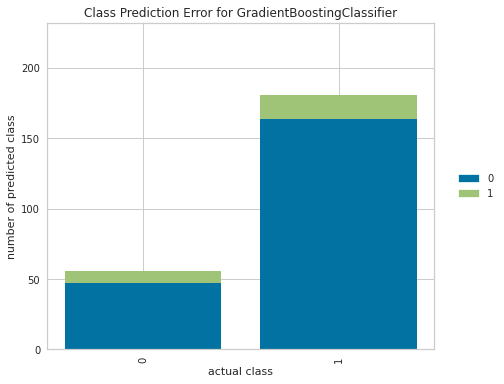

In [73]:
plot_model(estimator = tuned_gbc, plot = 'error')

In [74]:
evaluate_model(estimator = tuned_gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Saving models

In [78]:
# finalize a model
final_nb = finalize_model(nb)

In [79]:
# save a model
save_model(final_nb, base_dir + 'models/bus/nb')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False,
                                       features_todrop=['Title_title',
                                                        'Review_content',
                                                        'Title_Dominant_Topic',
                                                        'Title_Perc_Dominant_Topic',
                                                        'Review_Dominant_Topic',
                                                        'Review_Perc_Dominant_Topic'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='sentiment_rating',
                                       time...
                 ('binn', 'passthrough'), ('rem_ou

## Loading model

In [80]:
# Loading the saved model
nb_model = load_model(base_dir + 'models/bus/nb')
nb_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Title_title',
                                                       'Review_content',
                                                       'Title_Dominant_Topic',
                                                       'Title_Perc_Dominant_Topic',
                                                       'Review_Dominant_Topic',
                                                       'Review_Perc_Dominant_Topic'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='sentiment_rating',
                                      time...
                ('binn', 'passthrough'), ('rem_outliers', 'passth